# Project Title
### Data Engineering Capstone Project

#### Project Summary
This project aims at combining different datasets from different sources to provide users and corporations with a better data model that should be efficent and easy to analyse.four different datasets are utlizied in this project which are:
* immigration dataset from the US National Tourism and Trade Office
* world temparture data
* us city dataset
* airport code dataset 

The project follows the follow steps:
* Step 1: Scope the Project and Gather Data
* Step 2: Explore and Assess the Data
* Step 3: Define the Data Model
* Step 4: Run ETL to Model the Data
* Step 5: Complete Project Write Up

In [1]:
# Do all imports and installs here
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import os
import configparser
import glob 
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf, col, isnan, when, count, desc, asc, sum, avg, min, max, countDistinct, count, mean, stddev, lit, split, regexp_extract, regexp_replace, date_format, to_date, to_timestamp, from_unixtime, unix_timestamp, year, month, dayofmonth, weekofyear, dayofweek, hour, minute, second, date_add, date_sub, datediff, months_between, to_date, to_timestamp, from_unixtime, unix_timestamp, year, month, dayofmonth, weekofyear, dayofweek, hour, minute, second, date_add, date_sub, datediff, months_between
from pyspark.sql.types import *
from pyspark.sql.functions import monotonically_increasing_id
from pyspark import SparkContext

### Step 1: Scope the Project and Gather Data

#### Scope 
the steps taken in this project is :
* loading the data from the four different sources into dataframes
* perform data cleaning steps to make sure the data is relevant to the scope of the project
* perform ETL processes by using spark
* load the data into a star schema "facts and dimension table"
* the project is executed using different tools such as amazon s3,spark

#### Describe and Gather Data 
The four datasets are described as follows:
* i94 Immigration Sample Data: immigration records from the US National Tourism and Trade Office
* world temparture data:contains sample data of cities tempratures from 1700's to 2013
* us city data: data about the demographic of us cities such as race, gender ...etc
* airport codes:contains data about the ariport of various cities

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.\
config("spark.jars.repositories", "https://repos.spark-packages.org/").\
config("spark.jars.packages", "saurfang:spark-sas7bdat:2.0.0-s_2.11").\
enableHiveSupport().getOrCreate()

df_spark = spark.read.format('com.github.saurfang.sas.spark').load('../../data/18-83510-I94-Data-2016/i94_apr16_sub.sas7bdat')


In [2]:
#create a spark session
spark=SparkSession.builder\
    .master('local[*]')\
    .appName('Capstone')\
    .getOrCreate()
#increase the executor memory and the driver memory
spark.sparkContext.setSystemProperty('spark.executor.memory', '32g')
spark.sparkContext.setSystemProperty('spark.driver.memory', '32g')

In [4]:
#load the immigration data into a spark dataframe
immigration_df=spark.read.csv('D:\data engineering project\immigration_data_sample.csv',header=True)

In [ ]:
immigration_df.limit(5).toPandas()

In [ ]:
df_spark.show(5)

### Step 2: Explore and Assess the Data
#### Explore the Data 
Using spark,the next step should be exploring the other datasets involved 

#### Cleaning Steps
Document steps necessary to clean the data

In [ ]:
# scope the immigratiom data
file_path='immigration_data_sample.csv'
immigration_data=spark.read.csv(file_path,header=True)

In [ ]:
immigration_data.show(5)

In [5]:
# scope the temprature data
temp_data=spark.read.csv('D:\data engineering project\GlobalLandTemperaturesByCity.csv',header=True)

In [ ]:
temp_data.show(5)

In [6]:
# scope the us city demographic data 
demo_data=spark.read.csv(r'D:\data engineering project\udacity_provided_project\us-cities-demographics.csv',header=True,sep=';')

In [ ]:
demo_data.show(5)

In [7]:
# scope the airport data 
airport_data=spark.read.csv(r'D:\data engineering project\udacity_provided_project\airport-codes_csv.csv',header=True)

In [ ]:
airport_data.show(5)

### cleaning data :
The following steps aim to perform multiple steps to ensure that the data is more relevant to the scope of the project

In [ ]:
!pip install utility

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Performing cleaning tasks here
# cleaning steps for immigration data
# identify number of missing col in each column
missing_values=dict()
total_values=dict()
for col in immigration_data.columns:
    val=immigration_data.filter(immigration_data[col].isNull()).count()
    missing_values.update({col:val})
    total_val=100*(val/immigration_data.count())
    total_values.update({col:total_val})
total_values,missing_values





In [ ]:
fig,ax=plt.subplots(figsize=(25,10))

ax.bar(total_values.keys(),total_values.values())
ax.set(title='percentage of missing values ',ylabel='percentage')


### remove null filled columns
Three columns have a percentage of 70% or more of missing values.Those columns should be removed.
### important:
The original copy of the data should be kept and a new improved dataframe should be created


In [ ]:
cols=["entdepu","insnum","occup"]
new_immigration=immigration_data.drop(*cols)

In [ ]:
new_immigration.printSchema()

### removing redundancies from data
Removing any duplicates from the data is important to improve it's quality

In [ ]:
# count the values of the data frame to compare 
before=new_immigration.count()

In [ ]:
new_immigration=new_immigration.dropDuplicates()
after=new_immigration.count()
before,after

It seems there is no duplicate rows in the immigration data sample

### removing null- containing rows 
for the scope of the project ,every row should not contain more than 50% missing values


In [ ]:
col_number=len(new_immigration.columns)
thresh=col_number/2

In [ ]:
new_immigration=new_immigration.dropna(thresh=13)


The previous steps should be performed for every dataset to ensure the quality of data 

In [8]:
from eda import cleaning_tasks

visualizing the missing values


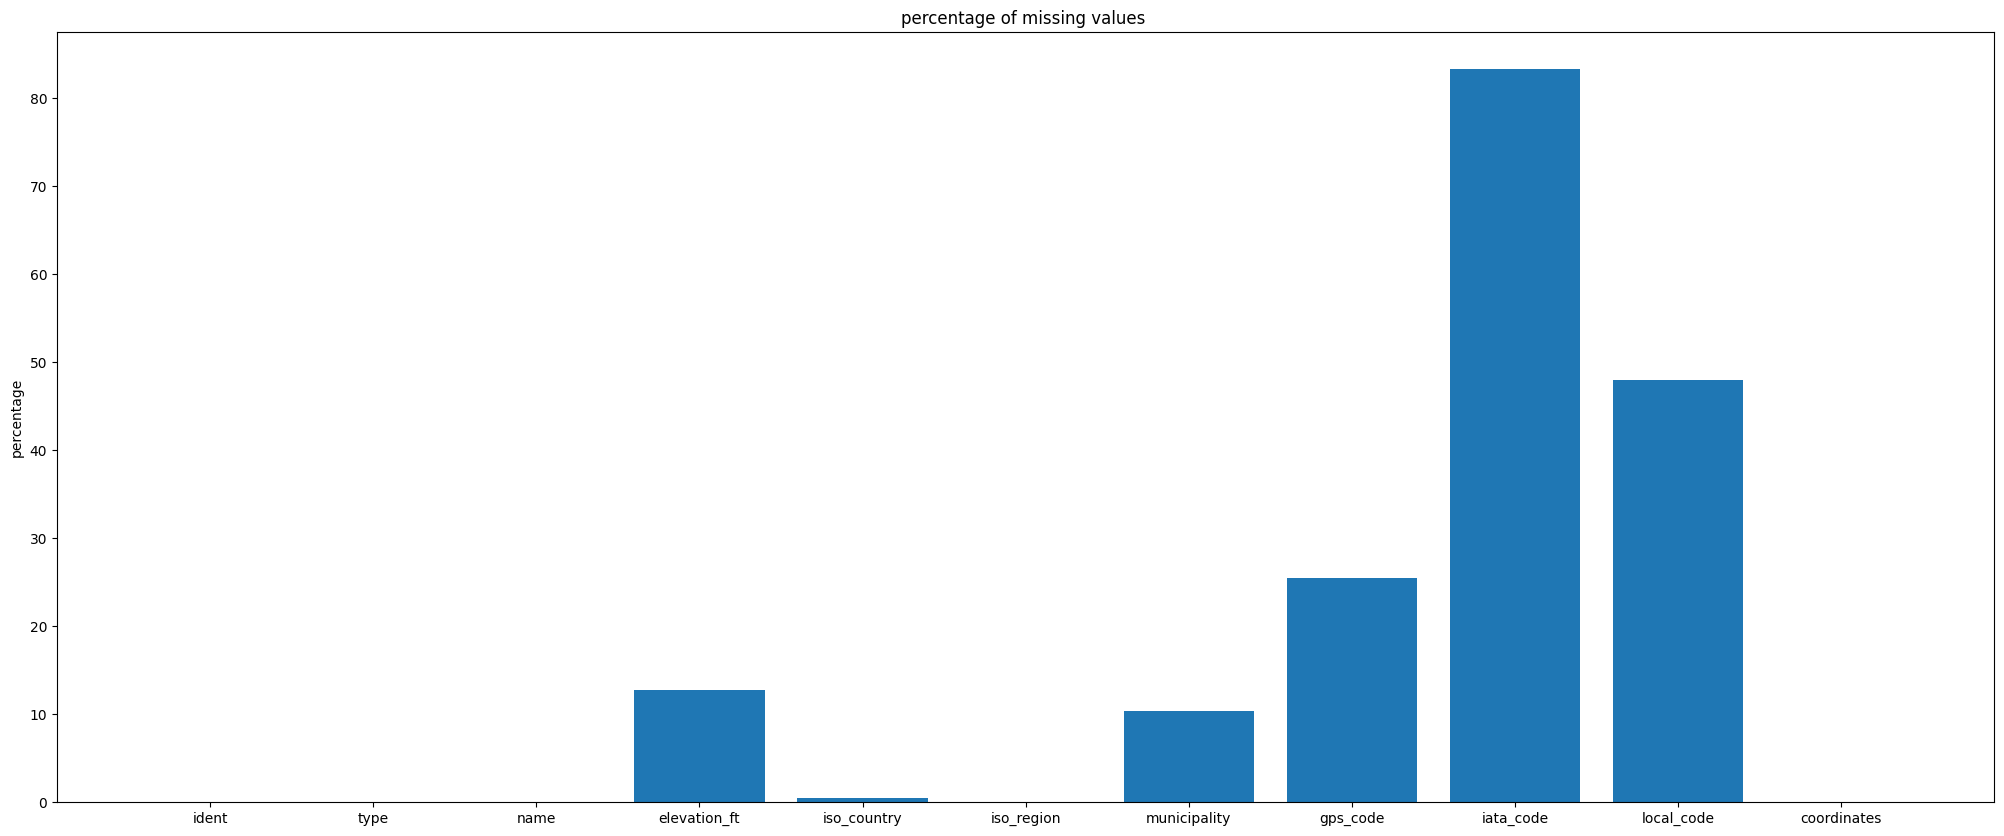

removing columns with 70% of missing values ['iata_code']
removing redundancies from dataframes
the number of rows before removing the redundancies is 55075 and after removing the redundancies is 55075
done !!!
+-----+-------------+--------------------+------------+-----------+----------+------------+--------+----------+--------------------+
|ident|         type|                name|elevation_ft|iso_country|iso_region|municipality|gps_code|local_code|         coordinates|
+-----+-------------+--------------------+------------+-----------+----------+------------+--------+----------+--------------------+
|  01J|small_airport|    Hilliard Airpark|        59.0|         US|     US-FL|    Hilliard|     01J|       01J|-81.9057006835937...|
| 01NJ|     heliport|Albert Guido Memo...|        10.0|         US|     US-NJ|      Newark|    01NJ|      01NJ|-74.1371002197265...|
| 05WI|small_airport|Ames Private Airport|       958.0|         US|     US-WI|      Darien|    05WI|      05WI|-88.745903015

In [9]:
#cleaning the airport code data
new_airport=cleaning_tasks(airport_data)
new_airport.show(5)

visualizing the missing values


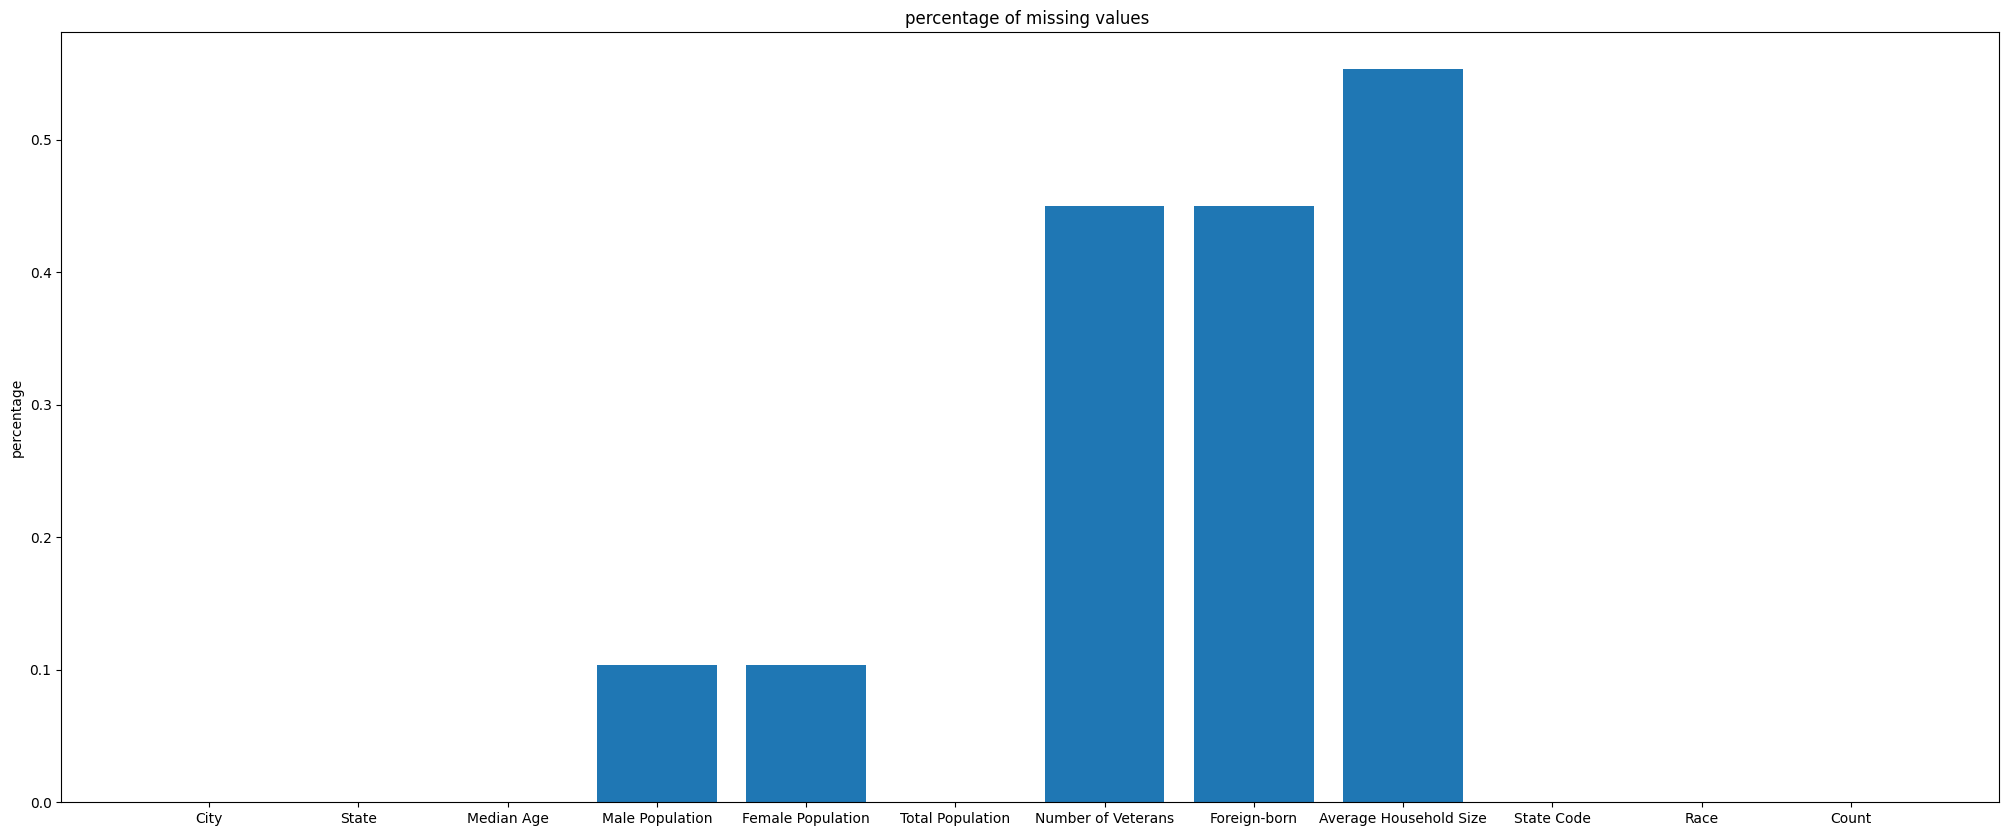

removing columns with 70% of missing values []
removing redundancies from dataframes
the number of rows before removing the redundancies is 2891 and after removing the redundancies is 2891
done !!!
+----------+----------+----------+---------------+-----------------+----------------+------------------+------------+----------------------+----------+--------------------+------+
|      City|     State|Median Age|Male Population|Female Population|Total Population|Number of Veterans|Foreign-born|Average Household Size|State Code|                Race| Count|
+----------+----------+----------+---------------+-----------------+----------------+------------------+------------+----------------------+----------+--------------------+------+
|   Lynwood|California|      29.4|          35634|            36371|           72005|               776|       28061|                  4.43|        CA|Black or African-...|  5346|
| Hollywood|   Florida|      41.4|          75358|            74363|          1497

In [10]:
#cleaning the demographic data 
new_demo=cleaning_tasks(demo_data)
new_demo.show(5)

In [ ]:
diff=set(demo_data.columns)-set(immigration_data.columns)
diff

### Note:
The temprature data contains data prior to 1950 which can be irrelevant to the scope of the project,Therefore the data should be filtered to dates within 2013 date or later

In [ ]:
#downsize the temprature data
temp_data=temp_data.filter(temp_data['dt']>'1950-1-01')

In [ ]:
temp_data.show(5)

visualizing the missing values


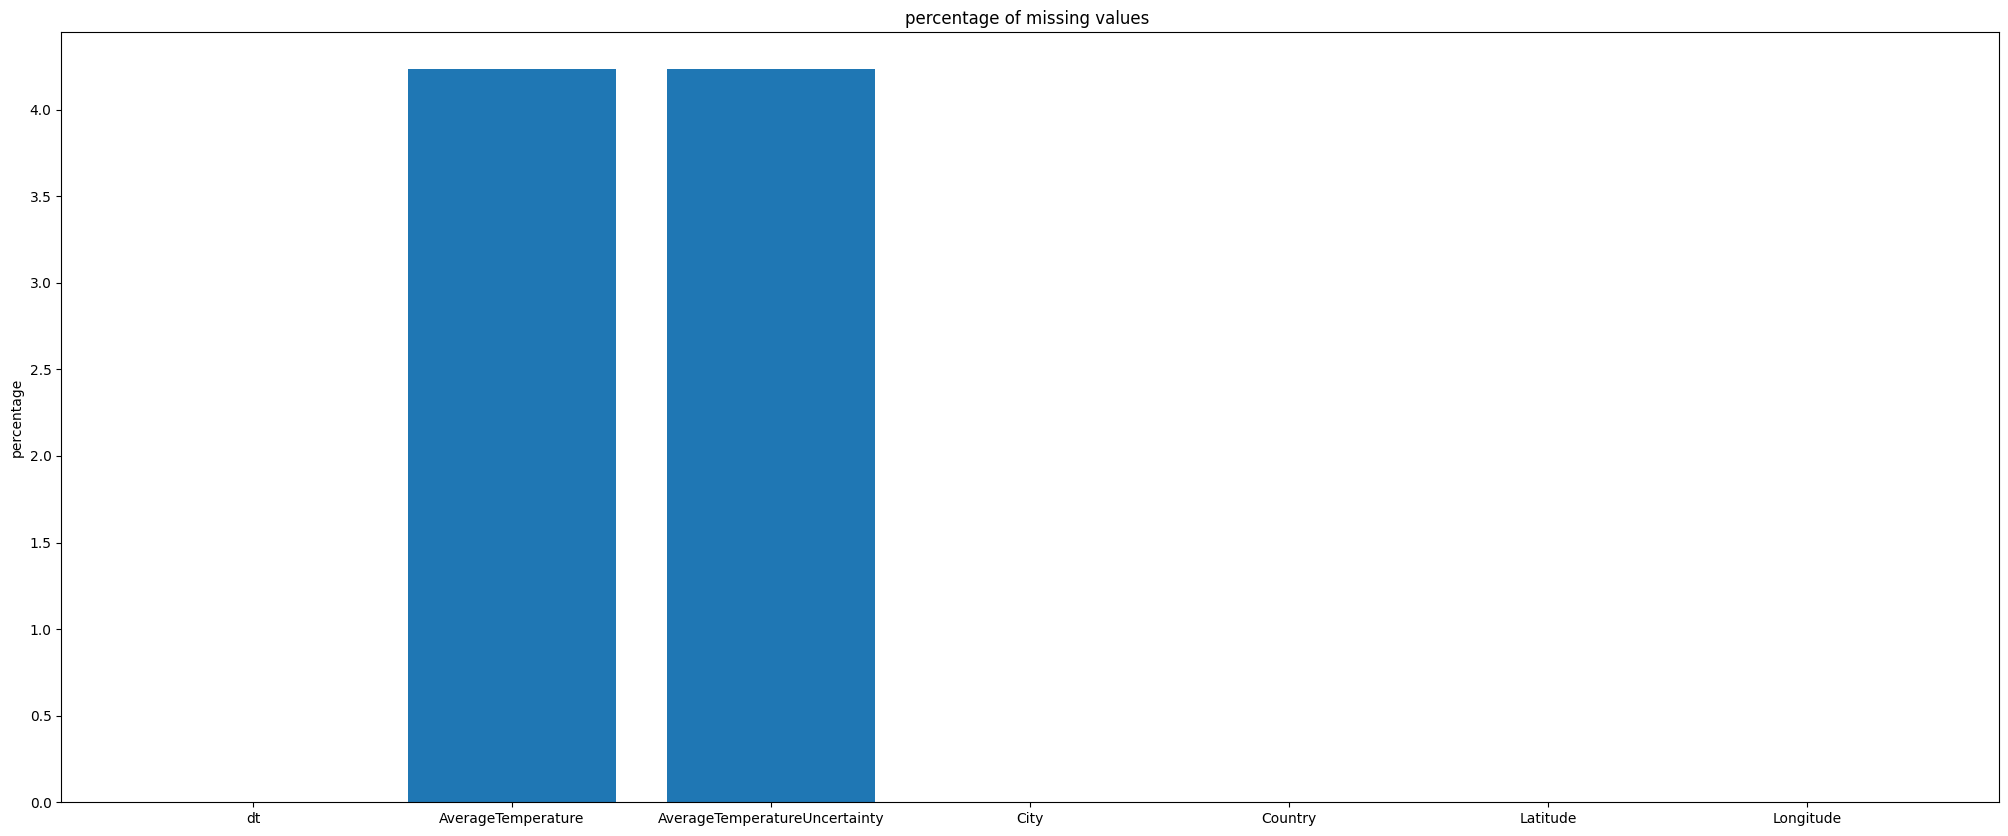

removing columns with 70% of missing values []
removing redundancies from dataframes
the number of rows before removing the redundancies is 8599212 and after removing the redundancies is 8599212
done !!!
+----------+------------------+-----------------------------+-------+---------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty|   City|  Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-------+---------+--------+---------+
|1875-02-01|              null|                         null| Bitung|Indonesia|   0.80N|  124.55E|
|1877-01-01|25.755000000000006|           1.5390000000000001|Bontang|Indonesia|   0.80N|  118.13E|
|1879-12-01|            25.533|                        1.148|Bontang|Indonesia|   0.80N|  118.13E|
|1890-01-01|            25.798|                        0.738|Bontang|Indonesia|   0.80N|  118.13E|
|1899-05-01|27.075000000000006|                         0.91|Bontang|Indonesia|   0.80N|  118.13E|
+---

In [11]:
#cleaning the temprature data
new_temp=cleaning_tasks(temp_data)
new_temp.show(5)

### note:
Since all the other datasets involve data about the usa,the temprature data should be reduced to reflect us cities only

In [12]:
new_temp=new_temp.filter(new_temp['Country']=='United States')
# new_temp.show(5)

In [ ]:
new_temp.count()

### note :
the immigration dataset contains data about immigrants from every age,so to keep the data relevant, only immigrants born in 1998 and later are taken into account in this project

In [ ]:
#get the downsized data
df_spark=df_spark.filter("biryear>=1998")

In [ ]:
#cleaning the full immigration data

visualizing the missing values


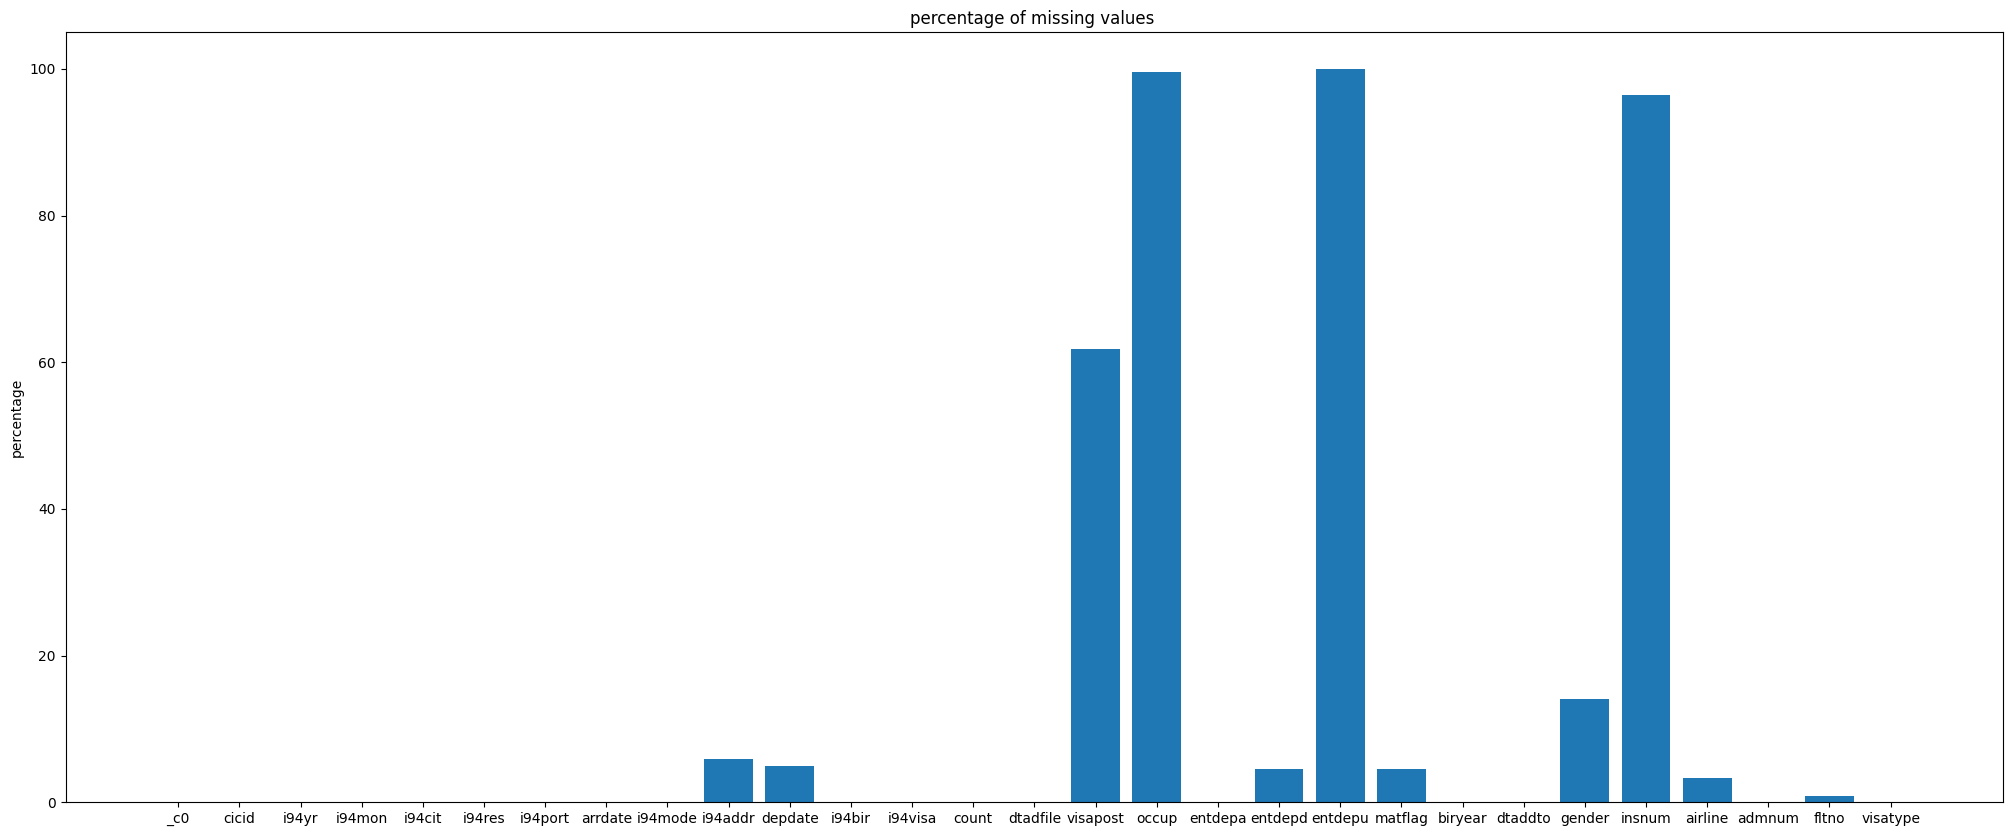

removing columns with 70% of missing values ['occup', 'entdepu', 'insnum']
removing redundancies from dataframes
the number of rows before removing the redundancies is 1000 and after removing the redundancies is 1000
done !!!


In [13]:
new_immigration=cleaning_tasks(immigration_df)
# new_immigration.limit(5).toPandas()

In [14]:
#free the memory from the original dataframes
temp_data.unpersist()
demo_data.unpersist()
airport_data.unpersist()
immigration_df.unpersist()

DataFrame[_c0: string, cicid: string, i94yr: string, i94mon: string, i94cit: string, i94res: string, i94port: string, arrdate: string, i94mode: string, i94addr: string, depdate: string, i94bir: string, i94visa: string, count: string, dtadfile: string, visapost: string, occup: string, entdepa: string, entdepd: string, entdepu: string, matflag: string, biryear: string, dtaddto: string, gender: string, insnum: string, airline: string, admnum: string, fltno: string, visatype: string]

In [15]:
del airport_data
del demo_data
del temp_data
del immigration_df

In [16]:
import gc
gc.collect()

15465

### Step 3: Define the Data Model
#### 3.1 Conceptual Data Model
* A star schema with a fact and five dimesnion tables was chosen to contain the data provided by the four datasets chosen for this project.
* This schema was chosen to reduce querying done by the anaylitics team and to present the data in a simple,efficent way for business needs.
The following diagram represents an illustration of the star schema :
![AltText](images\tables_schema.png)

#### 3.2 Mapping Out Data Pipelines
The following steps are taken to ensure the star schema is correctly executed:
* create dataframes from the availible datasets 
* perform cleaning and reduction processes on the dataframes 
* create the staging tables for easier loading into the desired schema
* create the fact and dimension tables
* perform etl processes
* run the data quality checks to ensure the data is loaded correctly

### Step 4: Run Pipelines to Model the Data 
#### 4.1 Create the data model
Build the data pipelines to create the data model.

The next step is to create the staging tables which combine the datasets to make the loading into the intended star schema more efficient

In [17]:
from staging_tables import create_staging_table1

In [18]:
staging_table1=create_staging_table1(spark,new_immigration,new_demo)

In [ ]:
staging_table1.limit(10).toPandas()

In [19]:
from staging_tables import create_staging_table2

In [20]:
staging_table2=create_staging_table2(spark,new_temp,new_airport)

In [ ]:
staging_table2.limit(10).toPandas()

### build the fact and dimensions tables
the last step is to create the fact and dimensions tables and ensure the quality of the data

In [21]:
#build the visa dimension table
from create_tables import create_visa_dim

In [22]:
visa_dim=create_visa_dim(spark,staging_table1,staging_table2)

In [23]:
#create the tempearture dimension
from create_tables import create_temp_dim

In [24]:
state_to_code=list()

In [25]:
temp_dim=create_temp_dim(spark,staging_table2,state_to_code)

In [26]:
#create the time dimension
from create_tables import create_time_dim

In [27]:
time_dim=create_time_dim(spark,staging_table1,staging_table2)

In [28]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [29]:
#create the airport dimesnion table
from create_tables import create_airport_dim

In [30]:
airport_dim=create_airport_dim(spark,staging_table1,staging_table2)


In [31]:
#create the demograhpic dimension
from create_tables import create_demographic_dim

In [32]:
demo_dim=create_demographic_dim(spark,staging_table1,staging_table2)

In [33]:
#create the immigration fact table
from create_tables import create_immigrant_fact

In [35]:
immigrant_fact=create_immigrant_fact(spark,staging_table1,staging_table2)

In [ ]:
visa=visa_dim.toPandas()

In [ ]:
visa=visa.drop(columns=['visatype','visapost'])

In [ ]:
visa.head(5)

In [ ]:
spark.conf.set('spark.sql.autoBroadcastJoinThreshold',-1)

In [36]:
#free the memory of the staging tables
del staging_table1
del staging_table2

#### 4.2 Data Quality Checks
To ensure that the etl process executed as needed, scoping the create schema and analyzing it is necesessary
* scope the data using  toPandas()
* calculate the count of the data
Run Quality Checks

In [37]:
import gc
gc.collect()

346636

In [ ]:
immigrant_fact.printSchema()

In [38]:
immigrant_fact.show(5)

+---------+------+-------+----------------+-------------+--------------------+-------+----------+-------+-----------+------------+--------------+
|       id|gender|i94visa|            City|       admnum|                Race|arrdate|state_code|depdate|average_age|arrival_date|departure_date|
+---------+------+-------+----------------+-------------+--------------------+-------+----------+-------+-----------+------------+--------------+
|4909999.0|     M|    2.0|         Fremont|94576073230.0|               Asian|20570.0|        CA|20659.0|       38.3|  2016-04-26|    2016-07-24|
|4909999.0|     M|    2.0|    Santa Monica|94576073230.0|               Asian|20570.0|        CA|20659.0|       40.6|  2016-04-26|    2016-07-24|
|4909999.0|     M|    2.0|          Upland|94576073230.0|               Asian|20570.0|        CA|20659.0|       39.7|  2016-04-26|    2016-07-24|
|4909999.0|     M|    2.0|         Salinas|94576073230.0|Black or African-...|20570.0|        CA|20659.0|       30.4|  2016-

In [ ]:
# scope the airport dimension 
airport_dim.toPandas().head(5)

In [ ]:
#calculate the count 
airport_dim.select("*").count()

In [ ]:
#scope the temperature dimension
temp_dim.toPandas().head(5)

In [ ]:
#calculate the count
temp_dim.select("*").count()

In [ ]:
#scope the demographic dimension
demo_dim.toPandas().head(5)

In [ ]:
#calculate the count
demo_dim.select("*").count()

In [ ]:
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")

In [ ]:
#scope the time dimension
time_dim.show(5)

In [ ]:
#calculate the count
time_dim.select("*").count()

In [ ]:
#scope the visa dimension
visa_dim.toPandas().head(5)

In [ ]:
#calculate the count
visa_dim.select("*").count()

In [39]:
#observe the immigrant table
immigrant_fact.toPandas().head(5)

,id,gender,i94visa,City,admnum,Race,arrdate,state_code,depdate,average_age,arrival_date,departure_date
0,4909999.0,M,2.0,Fremont,94576073230.0,Asian,20570.0,CA,20659.0,38.3,2016-04-26,2016-07-24
1,4909999.0,M,2.0,Santa Monica,94576073230.0,Asian,20570.0,CA,20659.0,40.6,2016-04-26,2016-07-24
2,4909999.0,M,2.0,Upland,94576073230.0,Asian,20570.0,CA,20659.0,39.7,2016-04-26,2016-07-24
3,4909999.0,M,2.0,Salinas,94576073230.0,Black or African-American,20570.0,CA,20659.0,30.4,2016-04-26,2016-07-24
4,4909999.0,M,2.0,Rancho Cucamonga,94576073230.0,Asian,20570.0,CA,20659.0,34.5,2016-04-26,2016-07-24


### 4.2.2 writing files to parquet to AWS s3
Since the immigration data is in monthly format,the previous steps should be executed in addition to writing the final tables to amazon S3
in parquet form to efficently store the data.

This process should be executed monthly to ensure the data is up to date.


In [ ]:
#read the config file
config = configparser.ConfigParser()
config.read('aws.cfg')

In [ ]:
$ export PYSPARK_DRIVER_PYTHON_OPTS="notebook --port=7999"

In [42]:
#write the tables to parquet  to the intended s3 bucket 
demo_dim.write.parquet('./parquet_tables/demo_dim.parquet')

In [43]:
visa_dim.write.parquet('./parquet_tables/visa_dim.parquet')

In [44]:
airport_dim.write.parquet('./parquet_tables/airport_dim.parquet')

In [45]:
temp_dim.write.parquet('./parquet_tables/temp_dim.parquet')

In [46]:
time_dim.write.parquet('./parquet_tables/time_dim.parquet')

In [47]:
immigrant_fact.write.parquet('./parquet_tables/immigrant_fact.parquet')

In [48]:
#free the dataframes
demo_dim.unpersist()
visa_dim.unpersist()
airport_dim.unpersist()
temp_dim.unpersist()
time_dim.unpersist()

DataFrame[arrdate: string, date: date, year: int, month: int, day: int]

In [49]:
# delete the datarames from the memory
del demo_dim
del airport_dim
del temp_dim
del visa_dim
del time_dim
gc.collect()

1872

In [ ]:
immigrant_fact.write.parquet('./parquet_tables/immigrant_fact.parquet')

In [ ]:
import boto3

In [ ]:
#upload the parquet files to s3
KEY=config['AWS']['AWS_ACCESS_KEY_ID']
SECRET_KEY=config['AWS']['AWS_SECRET_KEY']
BUCKET=config['AWS']['S3_BUCKET_NAME']
#create a session
session=boto3.session(aws_access_key_id=KEY, aws_secret_access_key=SECRET_KEY, region_name="us-west-2")
#create an s3 resource
s3=boto3.resource('s3')
#create a bucket instance
bucket=s3.bucket(BUCKET)
#loop through all the parquet files 
for root, dirs, files in os.walk('parquet_tables'):
    for file in files:
        #get the full path
        path=os.join(root,file)
        with open(path,'rb') as parquet_file:
            #upload the file to s3
            bucket.put_object(Key=path, Body=parquet_file)


### summary:
This project aims to create data pipelines from various datasources to provide meaningful insights to the analytics team
the project map is best summarized in the diagram below:
![alt text](images/ETL_DIAGRAM1.png)

As seen in the previous image ,data is extracted from the four different available sources and then processed into spark dataframes.

the next step is to create the staging tables and populate them using the previously created dataframes.

The third step is to create the fact and dimensions tables for the star schema and perform etl processes on the staging tables to load the data.

The final step is to save the files to parquet format and store them in s3 for the anayltics team to perform analysis on.

#### 4.3 Data dictionary 
Create a data dictionary for your data model. For each field, provide a brief description of what the data is and where it came from. You can include the data dictionary in the notebook or in a separate file.


<strong> a dictionary text file is provided which notates every table

#### Step 5: Complete Project Write Up
* Clearly state the rationale for the choice of tools and technologies for the project.
* Propose how often the data should be updated and why.
* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
 * The database needed to be accessed by 100+ people.

For the scope of the project and the size of the provided datasets,three different tools were used:
* spark: best for handling data streaming and processing of large quantities of data
* pandas: best for exploration of data and gaining insights on data
* AWS s3: best for storing large volumes of data and accessing them easily

### The data was increased by 100 fold:
If the data increased by 100 times , the appropiate way to handle it would be to incroprate the usage of Amazon EMR ,
as it is built for the purpose of hosting big data 

### The data populates a dashboard everyday by 7am:
Apache airflow is a data automation tool that run DAGS inteded to perform certain operations on data,
so impleminting airflow into the scope of the project would be the right choice

### The data is needed to be accessed by 100+ people:
For it's high scalibilty and efficency, redshift would be connected to s3 to better serve the increasing number of intrest in the project